## Analysis on
* CPI vs HPI vs Unemployment vs Mortgage
* *Is there a correlation between CPI vs HPI vs Unemployment vs Mortgage?*

In [ ]:
import pandas as pd
import hvplot.pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

## Reading and Preprocessing Data


In [2]:
#reading home price index
df_hpi = pd.read_csv("../Resources/Data/Home-price-index.csv")

df_hpi.head()

,DATE,CSUSHPISA
0,1/1/1987,63.964
1,2/1/1987,64.424
2,3/1/1987,64.736
3,4/1/1987,65.132
4,5/1/1987,65.563


In [3]:
#investigating data for data types
df_hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       439 non-null    object 
 1   CSUSHPISA  439 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [4]:
#rename columns
df_hpi.rename(columns={"DATE" : "Date", "CSUSHPISA" : "HPI" }, inplace=True)
df_hpi.head()

#converting to datetime 
df_hpi["Date"] = pd.to_datetime(df_hpi["Date"])

df_hpi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    439 non-null    datetime64[ns]
 1   HPI     439 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.0 KB


In [5]:
#reading cpi dataset
df_cpi = pd.read_csv("../Resources/Data/US_inflation_rates.csv")

df_cpi.head()

,date,value
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [6]:
#renaming columns
df_cpi.rename(columns={"date" : "Date" , "value" : "CPI"}, inplace=True)
df_cpi.head()

,Date,CPI
0,1/1/1947,21.48
1,2/1/1947,21.62
2,3/1/1947,22.00
3,4/1/1947,22.00
4,5/1/1947,21.95


In [7]:
#converting date column data to datetime
df_cpi["Date"] = pd.to_datetime(df_cpi["Date"])
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    918 non-null    datetime64[ns]
 1   CPI     918 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.5 KB


In [8]:
#reading unemployment data
df_unem = pd.read_csv("../Resources/Data/FRED_unemp_rate.csv")

df_unem.head()

,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [9]:
#renaming columns
df_unem.rename(columns={"DATE" : "Date", "UNRATE" : "Unemployment"}, inplace=True)
df_unem.head()

,Date,Unemployment
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [10]:
#converting date column data to datetime
df_unem["Date"] = pd.to_datetime(df_unem["Date"])
df_unem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          923 non-null    datetime64[ns]
 1   Unemployment  923 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


In [11]:
#reading mortgage data
df_mortage_30 = pd.read_csv("../Resources/Data/MORTGAGE30US.csv")
df_mortage_30.head()

,observation_date,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [12]:
#checking dataset and renaming columns 
df_mortage_30.info()
df_mortage_30.rename(columns={"observation_date" : "Date", "MORTGAGE30US" : "Fixed rate 30"}, inplace=True)
df_mortage_30.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  2803 non-null   object 
 1   MORTGAGE30US      2803 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.9+ KB


,Date,Fixed rate 30
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [13]:
#converting date column data to datetime
df_mortage_30["Date"] = pd.to_datetime(df_mortage_30["Date"])
df_mortage_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2803 non-null   datetime64[ns]
 1   Fixed rate 30  2803 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.9 KB


## Merging Data

In [14]:
#merging cpi and hpi datasets
df_cpi_hpi = pd.merge(df_hpi, df_cpi, how='inner', on="Date" )
df_cpi_hpi.head()

,Date,HPI,CPI
0,1987-01-01,63.964,111.4
1,1987-02-01,64.424,111.8
2,1987-03-01,64.736,112.2
3,1987-04-01,65.132,112.7
4,1987-05-01,65.563,113.0


In [15]:
#merging new cpi and hpi with unemployment dataset 
df_cpi_hpi_unem = pd.merge(df_cpi_hpi, df_unem, how='inner', on="Date")
df_cpi_hpi_unem.head()

,Date,HPI,CPI,Unemployment
0,1987-01-01,63.964,111.4,6.6
1,1987-02-01,64.424,111.8,6.6
2,1987-03-01,64.736,112.2,6.6
3,1987-04-01,65.132,112.7,6.3
4,1987-05-01,65.563,113.0,6.3


In [16]:
#merging new cpi, hpi, and unemployment with mortgage dataset
df_cpi_hpi_unem_mort = pd.merge(df_cpi_hpi_unem, df_mortage_30, how='inner', on="Date")
df_index = df_cpi_hpi_unem_mort.set_index("Date")
df_index.head()


,HPI,CPI,Unemployment,Fixed rate 30
Date,,,,
1987-05-01,65.563,113.0,6.3,10.47
1988-04-01,69.977,117.2,5.4,10.05
1988-07-01,71.354,118.5,5.4,10.39
1989-09-01,76.056,124.8,5.3,10.22
1989-12-01,76.705,126.3,5.4,9.74


In [17]:
#filter data to show only 2015 to 2024
df_index_2015_2024 = df_index.loc["2015-01-01" : "2024-01-01"] 
df_index_2015_2024

,HPI,CPI,Unemployment,Fixed rate 30
Date,,,,
2015-10-01,174.792,237.733,5.0,3.85
2016-09-01,182.824,241.176,5.0,3.46
2016-12-01,185.725,242.637,4.7,4.08
2017-06-01,190.510,244.163,4.3,3.94
2018-02-01,199.217,249.529,4.1,4.22
2018-03-01,199.954,249.577,4.0,4.43
2018-11-01,205.685,252.594,3.8,4.83
2019-08-01,210.120,256.059,3.6,3.75
2020-10-01,229.840,260.286,6.8,2.88


## Visualizations
### Range of Data - Pre and Post Pandemic 

* Correlation Map 
* Boxplot

## Analysis
* From the Correlation Map we can see that HPI and CPI has a strong positive correlation with mortage rates, meaning that as inflation and the prices of homes goes up so does the interest rates of mortgages.
* We can also see that Unemployment and Mortgage rates have a strong negative correlation so as inflation goes down so does Mortgage rates. 

In [18]:
#run correlation
corr_matrix = df_index_2015_2024[["HPI", "CPI", "Unemployment","Fixed rate 30"]].corr()
corr_matrix


,HPI,CPI,Unemployment,Fixed rate 30
HPI,1.000000,0.989555,-0.215485,0.608077
CPI,0.989555,1.000000,-0.321462,0.705924
Unemployment,-0.215485,-0.321462,1.000000,-0.767006
Fixed rate 30,0.608077,0.705924,-0.767006,1.000000


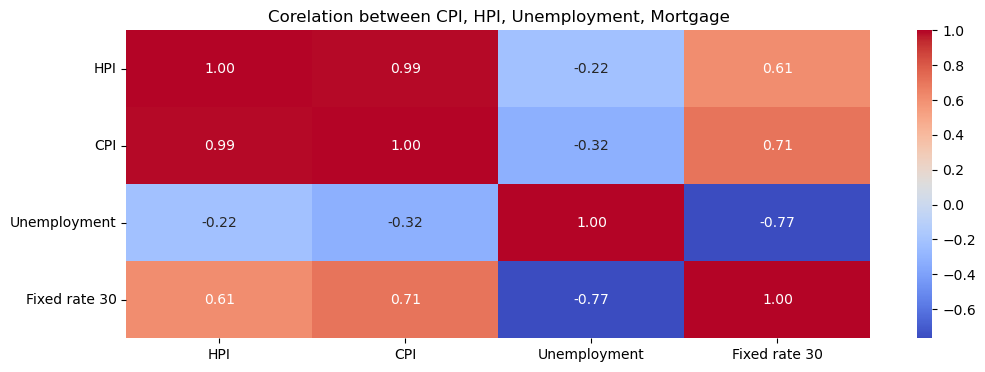

In [19]:
#plot heatmap 
plt.figure(figsize=(12,4))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",cbar=True)
plt.title("Corelation between CPI, HPI, Unemployment, Mortgage")

plt.show()

In [20]:
#indexing to show years 2015-2024
df_index_2015_2024["Year"]= df_index_2015_2024.index.year


df_index_2015_2024["Month"]= df_index_2015_2024.index.month

df_index_2015_2024["Quarter"]= df_index_2015_2024.index.quarter

df_index_2015_2024.head()


,HPI,CPI,Unemployment,Fixed rate 30,Year,Month,Quarter
Date,,,,,,,
2015-10-01,174.792,237.733,5.0,3.85,2015,10,4
2016-09-01,182.824,241.176,5.0,3.46,2016,9,3
2016-12-01,185.725,242.637,4.7,4.08,2016,12,4
2017-06-01,190.510,244.163,4.3,3.94,2017,6,2
2018-02-01,199.217,249.529,4.1,4.22,2018,2,1


## Analysis
* We can see that from the boxplot that CPI (inflation) has the widest range of data and that Mortgage rates is the only datarange with an outlier. Using what we learned from the Correlation map between inflation and mortgage rates it is safe to say that the spike in mortgage rate coincides with the spike of inflation during the pandemic.

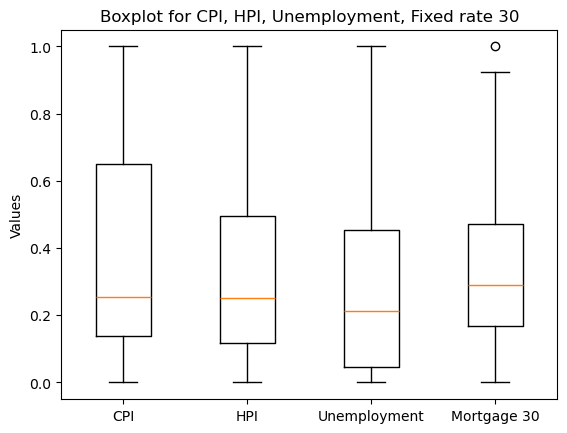

In [21]:
#normalizing data
df_box_plot = df_index_2015_2024[["HPI", "CPI", "Unemployment","Fixed rate 30"]]
df_box_plot
for column in df_box_plot:
    
    #apply Min-Max normalization technique for column

    df_box_plot[column] =(df_box_plot[column] - df_box_plot[column].min()) / (df_box_plot[column].max() - df_box_plot[column].min())
    df_box_plot[column] = df_box_plot[column] * (df_box_plot[column].max() - df_box_plot[column].min()) + df_box_plot[column].min()


df_box_plot.head()

#plot boxplot
plt.boxplot(df_box_plot)
plt.title("Boxplot for CPI, HPI, Unemployment, Fixed rate 30")
plt.ylabel("Values")
#colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF']
labels = ["CPI", "HPI", "Unemployment", "Mortgage 30"]
plt.xticks(range(1, len(labels) + 1), labels)


plt.show()